> What's wrong with (hypothesis significance testing)? Well, among many other things, it does not tell us what we want to know, and we so much want to know what we want to know that, out of desperation, we nevertheless believe that it does! - Cohen

__Note__ For this notebook I follow the discussion made in R.R.Pagano, 'Understanding the Statistics in Behaviour Sciences.'

# Effect Size

## Size of Effect: Significant vs Important 

Q: Consider the case where we analyzed the results of an social experiment with an hypothesis testing. Suppose at the end we concluded that the results are significant. What do we really mean by this?

Let's try to explain what we mean: 


__Scenerio__: Are SAT-Math scores at one college greater than the known population mean of 500?

Data are collected from a random sample of 1,200 students at that college. The population standard deviation unknown. Find a one-sample mean test and determine p_value. Then determine whether null hypothesis should be rejected ($\alpha = 0.05$).

-  Write alternative hypothesis here (use one sided altenative hypothesis)


In [1]:
## use this pickled object to run the 
## hypothesis testing

import numpy as np

from scipy import stats

import pickle

with open('sample1.pickle', 'rb') as handle:
    sample = pickle.load(handle)

In [2]:
sample.mean()

508.3923958670853

In [3]:
# %load -r 1-22 supplement.py
#population mean
mu = 500

# let's find the sample mean
x_bar = sample.mean()

# know let's find the standard error
# note that we don't know the population standard deviation
# so instead we will use sample standard deviation as an estimator

s = sample.std(ddof = 1)/np.sqrt(len(sample))

# know we will find a t-score by dividing the difference in means
# with standard error

t = (x_bar - mu)/s

# note that we know that t-score should lie on a t-distribution with
# degrees of freedom len(sample) - 1 as the parameter.
# let's use t method from scipy.stats

p_value = stats.t.sf(t, df = len(sample) - 1)

In [4]:
stats.ttest_1samp(sample, popmean= 500)

Ttest_1sampResult(statistic=2.8971592990279116, pvalue=0.003834009139611028)

In [5]:
print("""t-statistics: %.3f
p_value is %.3f"""%(t, p_value))

t-statistics: 2.897
p_value is 0.002


In [6]:
p_value*2

0.0038340091396110187

## Cohen's D for measuring effect size

It looks like there is a statistically significant difference in the exam scores between our sample and the population. Now question is this difference important?

-  Cohen(1988) gave a very simple method for determining the magnitude of the importance.

__Case 1:__ When we know the population std!

$$ d = \frac{|\bar{x} - \mu |}{\sigma} $$

- $\bar{x}$ sample mean
- $\mu$ population mean
- $\sigma$ population standard deviation
- $|\cdot|$ absolute value

!! Wait a minute is this the same with z-score?

__Case 2:__ When the population mean is not available!

$$ d = \frac{|\bar{x} - \mu |}{s} $$


- $\bar{x}$ sample mean
- $\mu$ population mean
- $s$ sample standard deviation


<table>
  <tr>
    <th>Header value of $d$</th>
    <th>Header interpretation of d</th>
  </tr>
  <tr>
    <td>0.0 - 0.20</td>
    <td>small effect</td>
  </tr>
  <tr>
    <td>0.20 - 0.79</td>
    <td> medium effect</td>
  </tr>
    <tr>
    <td>$\geq$ 0.80</td>
    <td> large effect</td>
  </tr>
</table>


__Your turn__ Find the Cohen's d score for the following problem.

In [13]:
d = (sample.mean() - 500)/sample.std(ddof =1)
print(d)

0.08363378505894961


## Effect size for two independent samples

- Recall that to test whether the mean populations of two samples are equal or not we mainly use two tests:

1. Independent two sample t-test 

<img src="img/two_sample_ttest.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />


<img src="img/pooled_std.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />
    
- Note that this version of the t-test assumes that the population standard deviations for the samples $\sigma_{1}$ and $\sigma_{2}$ are the same.

- Unfortunately this is not very realistic assumption most of the time. In that sense, it is suggested to use Welch's test instead of two sample t-test.


__Your Turn!__

- Load the following samples and determine whether they come from populations with the same means.

- Use both two-sample t-test and Welch's test and compare the results.


$H_{0}:$ $\mu_{1} = \mu_{2}$

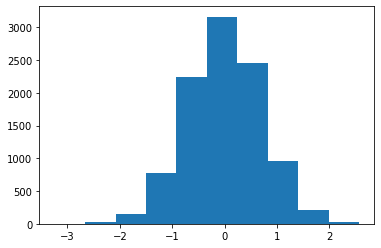

In [40]:

import matplotlib.pyplot as plt
%matplotlib inline


## Note that if samples would come from the populations with 
## same mean then the differences of the samples should normally
## distribute around 0

## here both mean and standard deviations of the 
## populations are the same


l =[]
for i in range(10000):
    s1 = np.random.normal(loc = 100, scale = 5, size = 100)

    s2 = np.random.normal(loc = 100, scale = 5, size = 100)

    l.append(s1.mean() - s2.mean())
    
plt.hist(l)
plt.show()

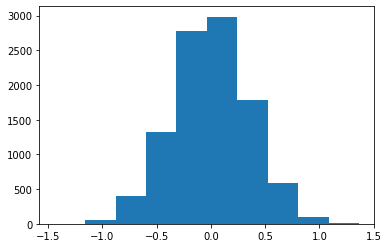

In [43]:
## even if the population variances are different
## if the population means are equal then
## we can expect that the differences of the sample means 
## will have normal shape around zero

l =[]
for i in range(10000):
    s1 = np.random.normal(loc = 100, scale = 10, size = 1000)

    s2 = np.random.normal(loc = 100, scale = 5, size = 1000)

    l.append(s1.mean() - s2.mean())

plt.hist(l)
plt.show()

In [52]:
## Now let's work with the following samples

sample1 = np.random.normal(loc = 100, scale = 10, size= 100)

sample2 = np.random.normal(loc = 110, scale = 10, size  = 60)

## note that we already know that the means are different. 
## In this case, please note that we can use two sample t-test

We can implement the formula directly:

In [58]:
# %load -r 25-35 supplement.py
## two sample t-test assuming same population variance
n1 = len(sample1)
n2 = len(sample2)

pooled_std = np.sqrt(((n1-1)*np.var(sample1, ddof =1) + (n2-1)*np.var(sample2, ddof = 1))/(n1+n2-2))

denom = pooled_std*np.sqrt(1/n1 + 1/n2)

num = sample1.mean() - sample2.mean()

t = num/denom

print("""t-value is %.7f"""%t)

## now we would use t-distribution with 
## degrees of freedom equals to n1+n2-2
## to find the p_values of such t

## we are using two sided hypothesis testing
p_value = (stats.t.cdf(t,  df= n1+n2-2))*2

print("""p_value is %.7f"""%p_value)

t-value is -4.2150440
p_value is 0.0000419


In [59]:
## Notice that we get the same result by 
## scipy.stats.ttest_ind

stats.ttest_ind(sample1, sample2, equal_var= True)

Ttest_indResult(statistic=-4.215043982371335, pvalue=4.188364909654648e-05)

If we are not sure whether population variances are the same than we should use Welch's test.

- To apply Welch's test: scipy.stats.ttest_ind has a parameter 'equal_var' when we set it equal to False.

In [61]:
##stats.ttest_ind(sample1,sample2, equal_var=False)

Now let's discuss whether this difference is important or not.


For some tests there are commonly used measures of effect size. For example, when comparing the difference in two means we often compute Cohen's d which is the difference between the two observed sample means in standard deviation units. 

$$ \begin{gather}
 d = \frac{|\bar{x}_{1} - \bar{x}_{2}|
 }{s_{W}}
\text{where} \qquad s_{W} = \sqrt{\frac{(n_{1}-1)s_{1}^{2} + (n_{2}-1)s_{2}^{2} }{n_{1} + n_{2} - 2}}
\end{gather}$$

__Your Turn!__

Find Cohen's d for sample1 and sample2


In [37]:
n1 = len(sample1)
n2 = len(sample2)
var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof =1)

num = (n1 -1 )*var1 + (n2-1)*var2

denom = (n1+n2 - 2)
s_W = np.sqrt(num/denom)

d = np.abs(sample1.mean() - sample2.mean())/s_W

print(d)

1.607023128205021


Note that for small sample size we didn't get a significant result but for very big sample size we were able to show that the mean is significantly different from the population. So the take away is, we should support the use of p_values with other statistics.


# Power of an Hypothesis Testing

- Recall $\alpha$ is the probability of making Type-I error when the null hypothesis is true.

- What about the the probability of making Type - II errors?

 - (We will call this probability as $\beta$.)
 
- Power of a statistical test measures an experiment's ability to reject a null-hypothesis when $H_{a}$ is true.
 
 Mathematically, the __power__ of an experiment is defined as the probability (1- $\beta$) that the results of an experiment will allow rejection of the null hypothesis if the independent variable has a real effect.

## Relationship between effect size and power

- As effect size increases power increases.

Let's try to understand this with and example. Suppose we are testing the following hypothesis:

- $H_{0}$: The population mean of Class-1 (Class-2) is 38 or less. Equivalently: $\mu_{1} \leq 38$

- $H_{a}$: The population mean of Class-1 (Class-2) is 38 or more. Equivalently $\mu_{1} > 38$

- significance level $\alpha = 0.05$

<table>
  <tr>
    <th>Data from Class 1</th>
    <th>Data from Class 2</th>
  </tr>
  <tr>
    <td>$\mu_{1} = 38$</td>
    <td> $\mu_{2} = 38$</td>
  </tr>
  <tr>
    <td>$\bar{x}_{1} = 40$</td>
    <td>$\bar{x}_{2} = 40$</td>
  </tr>
  <tr>
    <td>$\sigma_{1} = 10$</td>
    <td> $\sigma_{2} =2$</td>
  </tr>
</table>

__your turn:__ Effect size for the first population

hint:0.20

__your turn:__ Effect size for the second population

hint: 1


- Sampling distribution for the Class-1:

$\mu_{1}  = 38$

standard_error = $\frac{\sigma_{1}}{\sqrt{n}} = \frac{10}{\sqrt{30}}$

- Sampling distribution for the Class-1:

$\mu_{1}  = 38$

standard_error = $\frac{\sigma_{2}}{\sqrt{n}}= \frac{2}{\sqrt{30}}$

Now let's assume $\alpha = 0.05$

- Cut-off for the Class-1:



In [ ]:
## note that after this z-score we have only 0.05 of the probability
z_cut = stats.norm.ppf(0.95)

## Above z_cut is for the standard normal distribution
## convert it to our problem

x1_bar = 38
sigma1 = 10
std_error = sigma1/np.sqrt(30)

cut_off = z_cut*std_error + x1_bar

print('cut-off for class 1 %.2f'%cut_off)


Let's do the same calculation for class 2

In [ ]:
## note that after this z-score we have only 0.05 of the probability
z_cut = stats.norm.ppf(0.95)

## Above z_cut is for the standard normal distribution
## convert it to our problem

x2_bar = 38
sigma2 = 2
std_error = sigma2/np.sqrt(30)

cut_off = z_cut*std_error + x2_bar

print('cut-off for class 1 %.2f'%cut_off)


__Discuss these findings__

## Power calculations


<img src="img/power1.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />


<img src="img/power2.png" alt="Cohen's d-table"
	title="Power of a test" width="650" />


## Sample size, $\alpha$ and Power


- Increasing sample size --> decreases the standard error --> power

- $\alpha:$ Probability of making Type-I error also it defines the rejection region.

So the larger the rejection region it is more likely that we will reject the null hypothesis. Therefore:

Increasing $\alpha$ --> increases power.

## Resources

- Null Hypothesis Significance Testing: A Review of an Old and Continuing Controversy - RS Nickerson

- [Penn State Statistics Courses](https://newonlinecourses.science.psu.edu/stat200/lesson/6/6.4)

- [Statistics For Business and Economics - 9.6](https://www.amazon.com/Statistics-Business-Economics-Book-Only/dp/0324783256)

- [G. Privitera, Statistics for Behavioral Sciences - ch-8](https://www.amazon.com/Statistics-Behavioral-Sciences-Gregory-Privitera/dp/1506386253)